In [1]:
#PROJECT BY DIVYANSH SHARMA/PRESIDENCY UNIVERSITY
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.io.data as web
#import pandas_datareader as pdr
from pandas_datareader import data
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
from __future__ import division

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,87.353982,84.917194,86.112747,86.215227,1.477071e+08,85.963689
std,20.358669,19.543458,20.145235,19.898141,7.679121e+07,20.050394
min,57.125000,53.152500,57.020000,56.092499,2.800120e+07,55.840385
25%,70.474998,69.245003,69.875000,69.934998,1.002064e+08,69.455833
50%,80.112503,78.912498,79.457497,79.577499,1.335680e+08,79.260696
75%,110.190002,103.099998,104.540001,106.839996,1.808603e+08,106.839996
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-31 to 2020-10-30
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


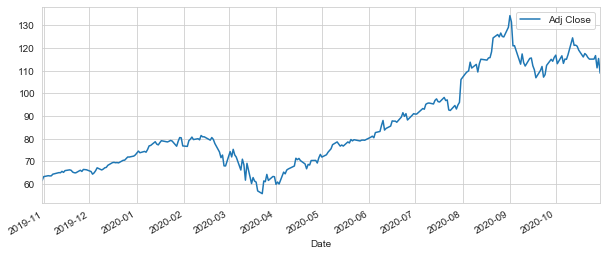

In [9]:
#HISTORICAL VIEW OF THE CLOSING PRICE OF AAPL
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

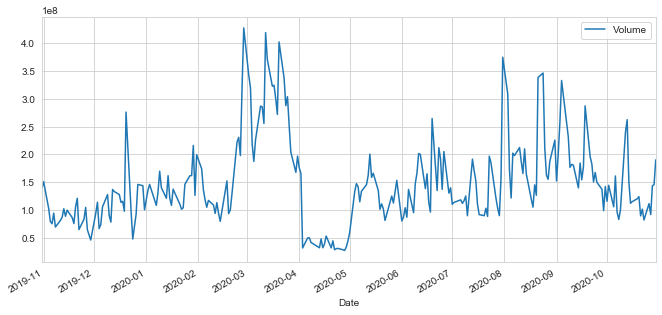

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(11,5))

In [11]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-31 to 2020-10-30
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


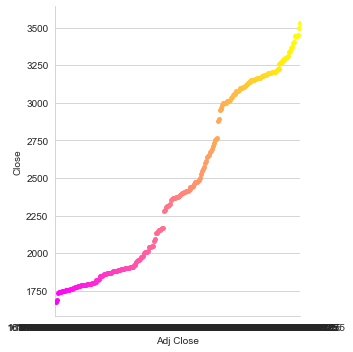

In [12]:
sns.catplot(x='Adj Close',y='Close',data=AMZN,legend=True,palette='spring')

In [13]:
ma_day = pd.Series([10,20,300])

for ma in ma_day:
    
    column_name= ("MA for %s days") %(str(ma))
    AAPL[column_name]= ma_day.rolling(ma).mean() 
  

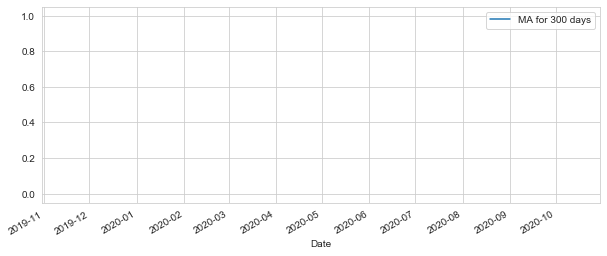

In [14]:
AAPL[[column_name]].plot(legend=True,figsize=(10,4))

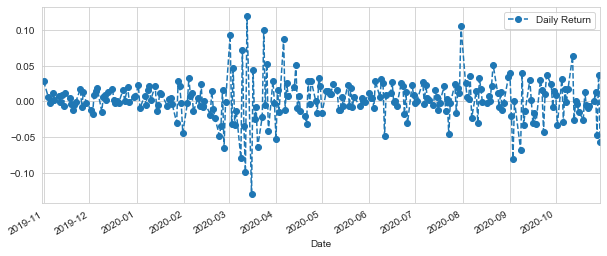

In [15]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

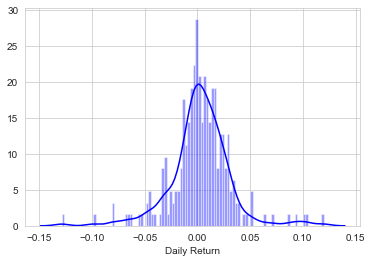

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [18]:
#Just want adjusted closing point
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close'] 

In [19]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-31,61.579021,1260.109985,141.756165,1776.660034
2019-11-01,63.326683,1273.739990,142.102234,1791.439941
2019-11-04,63.742554,1291.369995,142.922897,1804.660034
2019-11-05,63.650970,1292.030029,142.833923,1801.709961
2019-11-06,63.678192,1291.800049,142.438400,1795.770020


In [20]:
#PCT_CHANGE = PERCCENTAGE CHANGE
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-31,NaN,NaN,NaN,NaN
2019-11-01,0.028381,0.010817,0.002441,0.008319
2019-11-04,0.006567,0.013841,0.005775,0.007380
2019-11-05,-0.001437,0.000511,-0.000623,-0.001635
2019-11-06,0.000428,-0.000178,-0.002769,-0.003297


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA897FB4C8>,
      dtype=object)

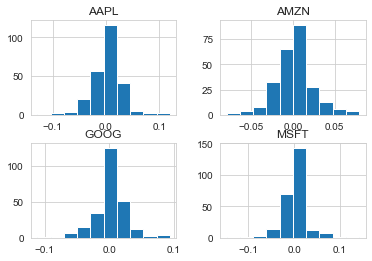

In [22]:
tech_rets.hist()

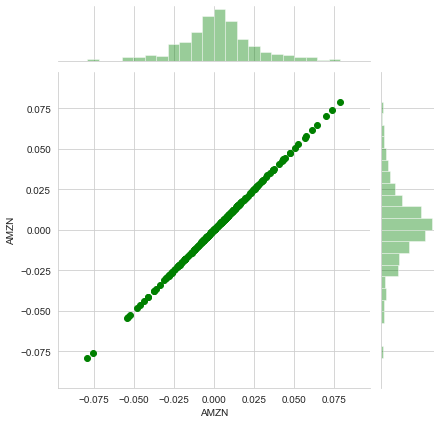

In [23]:
sns.jointplot('AMZN','AMZN',tech_rets,kind = 'scatter',color = 'green')

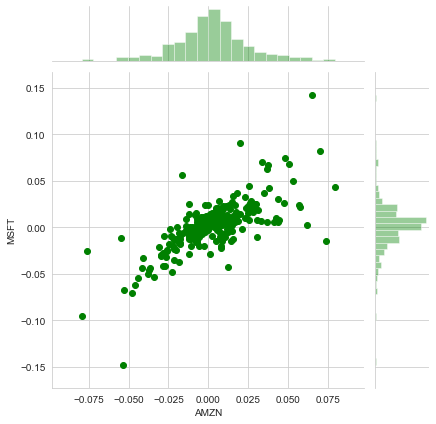

In [24]:
sns.jointplot('AMZN','MSFT',tech_rets,kind = 'scatter',color = 'green')

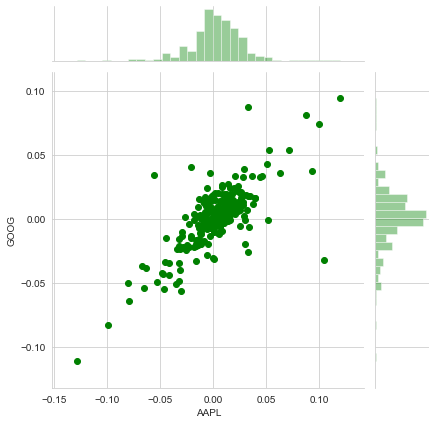

In [41]:
sns.jointplot('AAPL','GOOG',tech_rets,kind = 'scatter',color = 'green')

# USE OF SEABORN AND PANDAS FOR COMPARISON OF STOCKS

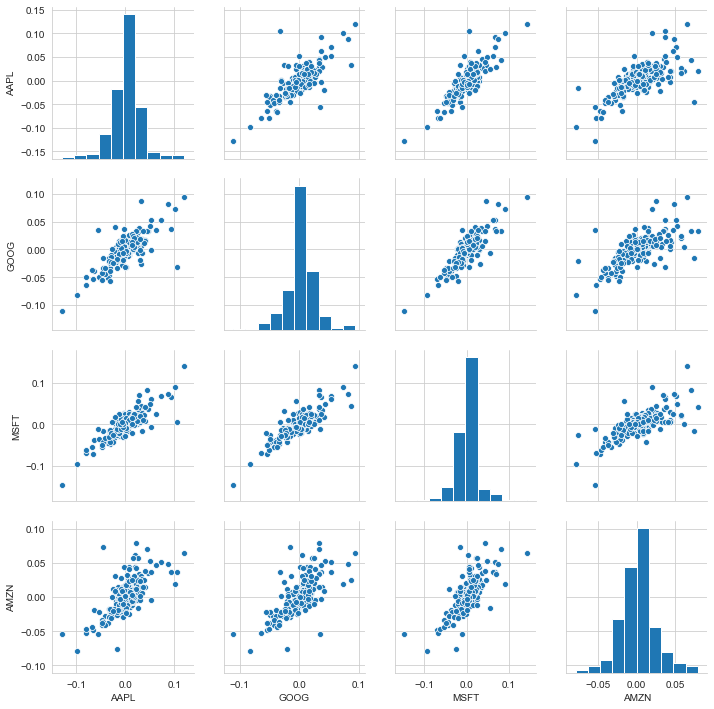

In [39]:
sns.pairplot(tech_rets.dropna())

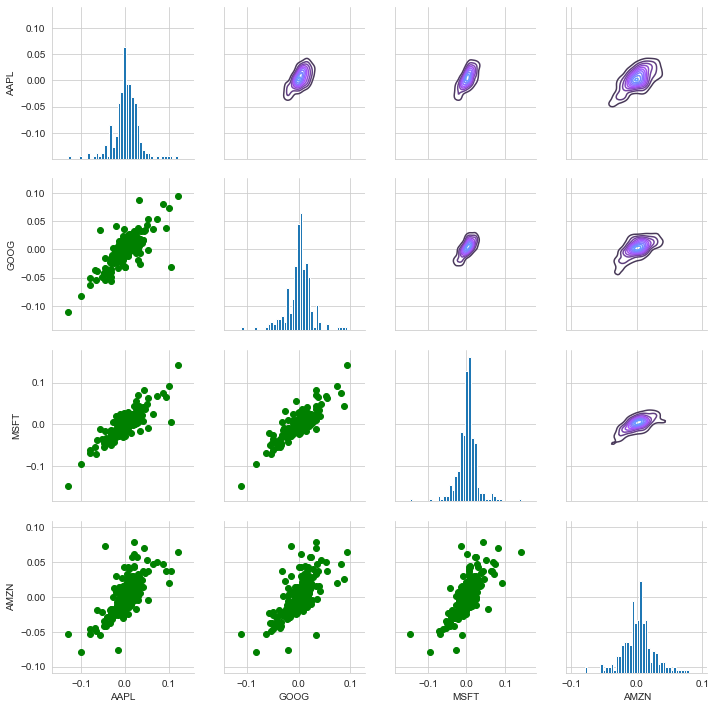

In [26]:
# `size` paramter has been renamed to `height`; please update your code.
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_lower(plt.scatter,color='green')
returns_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=40)

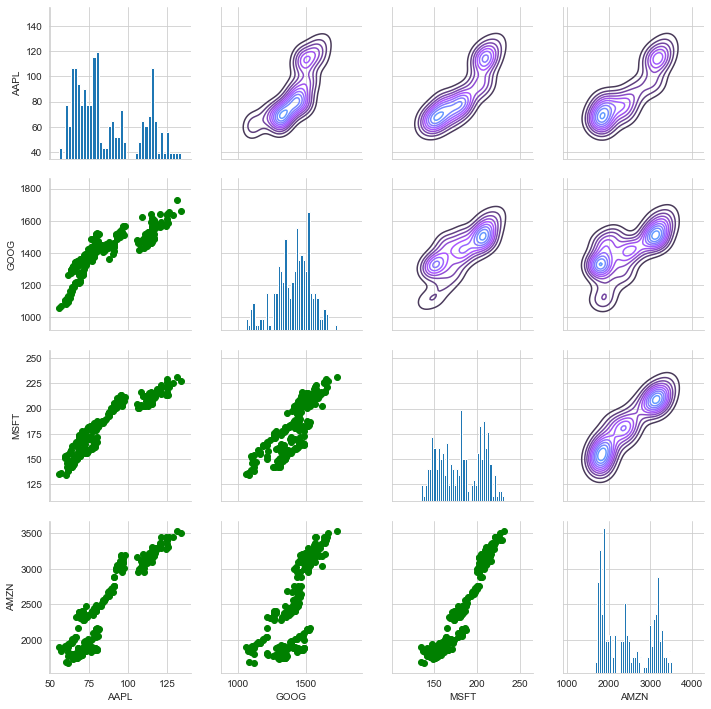

In [27]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_lower(plt.scatter,color='green')
returns_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=40)

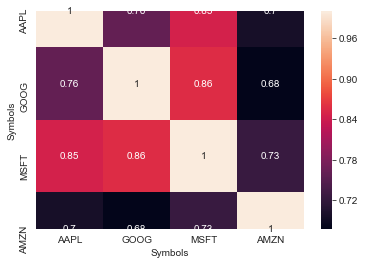

In [28]:
#CORREALTION PLOTS  OR HEATMAP AS CORRPLOT HAS DEPRECIATED
#sns.corrplot(tech_rets.dropna(),annot=True)
sns.heatmap(tech_rets.dropna().corr(), annot=True)
plt.show()

# RISK ANALYSIS

There are many ways we can quantify risk,one of the most basic ways using thr information we have gather on Daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [29]:
rets = tech_rets.dropna()

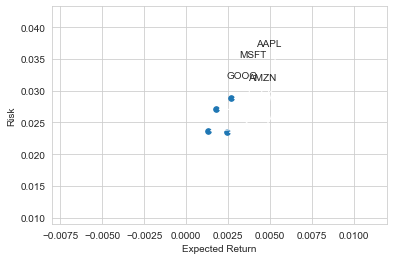

In [30]:
area = np.pi*10

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
#Label the scatter plots,for more info on how this is done, check out the line below
# http://matplotlib.org/users/annotations_guide.html
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='->', connectionstyle = 'arc3,rad=-0.9'))

# Value at Risk

Let's go ahead and define a value at risk parameter for our stocks.We can treat value at risk as the money we could expect to lose(aka putting at risk)for a given confidence interval.These several methods we can use for estimating a value at risk.

# VALUE AT RISK USING BOOTSTRAP METHOD

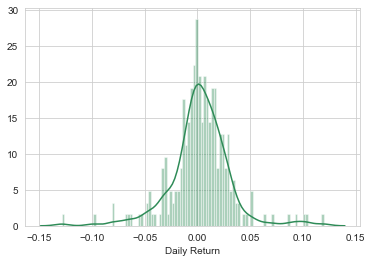

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='seagreen')

In [32]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-01,0.028381,0.010817,0.002441,0.008319
2019-11-04,0.006567,0.013841,0.005775,0.007380
2019-11-05,-0.001437,0.000511,-0.000623,-0.001635
2019-11-06,0.000428,-0.000178,-0.002769,-0.003297
2019-11-07,0.011541,0.013206,0.001388,-0.004215


In [33]:
rets['AAPL'].quantile(0.05)

-0.04486871629818763

In [34]:
rets['GOOG'].quantile(0.05)


-0.0408651470208229

In [35]:
rets['MSFT'].quantile(0.05)

-0.041689674196587964

In [36]:
rets['AMZN'].quantile(0.05)

-0.03504722651293177